In [1]:
import warnings
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
import numpy as np

iris = pd.read_csv("Iris.csv")
iris.sample(n=10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
19,5.1,3.8,1.5,0.3,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor
41,4.5,2.3,1.3,0.3,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [3]:
iris.isna().any()

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [4]:
iris.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [5]:
iris_cc = iris['Class']
iris_cc = iris_cc.to_frame('Class')
iris_cc = iris_cc.drop_duplicates().reset_index(drop=True)
iris_cc['Category'] = iris_cc['Class']
iris_cc['Category'] = iris_cc['Category'].astype(dtype='category').cat.codes
print(iris_cc.head())

             Class  Category
0      Iris-setosa         0
1  Iris-versicolor         1
2   Iris-virginica         2


In [6]:
iris['Class'] = iris['Class'].astype(dtype='category').cat.codes
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
print(iris.dtypes)

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                      int8
dtype: object


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [8]:
iris.corr().Class.between((-0.1),(0.1))
# No Columns to drop

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
Name: Class, dtype: bool

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [9]:
iris.var().between(0,0.1)
# No columns to drop

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

## Question 6

*Plot the scatter matrix for all the variables.*

(array([-1.,  0.,  1.,  2.,  3.]), <a list of 5 Text xticklabel objects>)

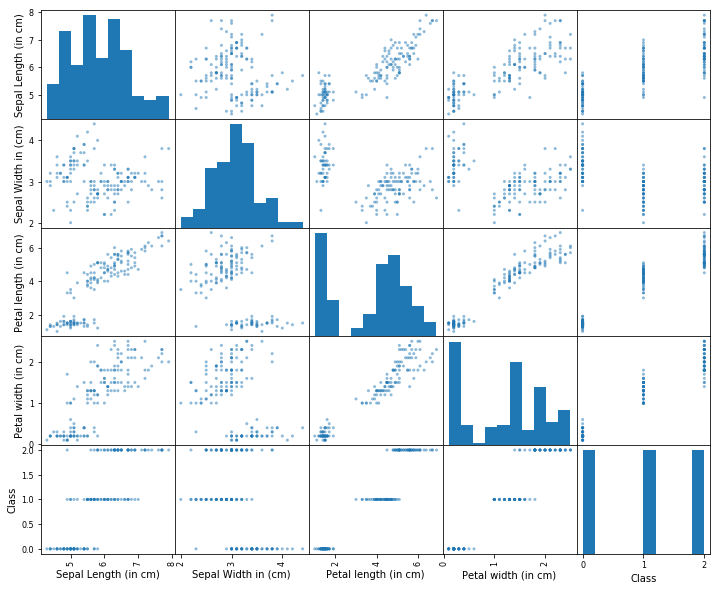

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix as scatter_matrix
%matplotlib inline
scatter_matrix(frame=iris,figsize=(12,10),range_padding=0.1)
plt.xticks(rotation=0)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [11]:
from sklearn.model_selection import train_test_split
x = iris.iloc[:,0:4]
y = iris.iloc[:,4:5]
# Since the Random State can take any value, I have chosen 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)
#print("X Train Shape:",x_train.shape)
#print("X Test Shape:",x_test.shape)
#print("Y Train Shape:",y_train.shape)
#print("Y Test Shape:",y_test.shape)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
#from scipy.stats import zscore
import seaborn as sns
# Train the model for 3 neighbours and test
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,np.ravel(y_train))
print("When k=3,")
#print(knn.score(x_test,y_test))
y_predicted = knn.predict(x_test)
print(accuracy_score(y_test,y_predicted))
# Train the model for 5 neighbours and test
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,np.ravel(y_train))
print("When k=5,")
#print(knn.score(x_test,y_test))
y_predicted = knn.predict(x_test)
print(accuracy_score(y_test,y_predicted))
# Train the model for 9 neighbours and test
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,np.ravel(y_train))
print("When k=9,")
#print(knn.score(x_test,y_test))
y_predicted = knn.predict(x_test)
print(accuracy_score(y_test,y_predicted))

When k=3,
1.0
When k=5,
1.0
When k=9,
0.9666666666666667


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [13]:
k = np.arange(1,20,2)
knn_mse_test = pd.DataFrame(data=k,columns=['k'])
knn_mse_train = pd.DataFrame(data=k,columns=['k'])
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,np.ravel(y_train))
    y_predicted = knn.predict(x_test)
    test_accuracy_score = accuracy_score(y_test,y_predicted)
    for j in knn_mse_test.k:
        if i == j:
            knn_mse_test.loc[round(i/2)-1:,'Test_Accuracy_Score'] = test_accuracy_score
            knn_mse_test.loc[round(i/2)-1:,'Misclassification_Error'] = 1-test_accuracy_score
    y_predicted = knn.predict(x_train)
    test_accuracy_score = accuracy_score(y_train,y_predicted)
    for j in knn_mse_train.k:
        if i == j:
            knn_mse_train.loc[round(i/2)-1:,'Test_Accuracy_Score'] = test_accuracy_score
            knn_mse_train.loc[round(i/2)-1:,'Misclassification_Error'] = 1-test_accuracy_score
print("Misclassification Error Score For Test Data")
knn_mse_test

Misclassification Error Score For Test Data


,k,Test_Accuracy_Score,Misclassification_Error
0,1,1.000000,0.000000
1,3,1.000000,0.000000
2,5,1.000000,0.000000
3,7,0.966667,0.033333
4,9,0.966667,0.033333
5,11,0.966667,0.033333
6,13,0.966667,0.033333
7,15,0.966667,0.033333
8,17,0.966667,0.033333
9,19,0.966667,0.033333


In [14]:
print("Misclassification Error Score For Training Data")
knn_mse_train

Misclassification Error Score For Training Data


,k,Test_Accuracy_Score,Misclassification_Error
0,1,1.000000,0.000000
1,3,0.958333,0.041667
2,5,0.958333,0.041667
3,7,0.975000,0.025000
4,9,0.975000,0.025000
5,11,0.975000,0.025000
6,13,0.975000,0.025000
7,15,0.975000,0.025000
8,17,0.975000,0.025000
9,19,0.966667,0.033333


In [15]:
print("Optimal Value of K from the best Non-overfitting Efficient Model in Test Data:")
best_k_in_test=knn_mse_test.where(knn_mse_test.Test_Accuracy_Score!=1).dropna().sort_values(by='Test_Accuracy_Score',ascending=False).iloc[:,0:2].head(1)
best_k_in_test

Optimal Value of K from the best Non-overfitting Efficient Model in Test Data:


,k,Test_Accuracy_Score
3,7.0,0.966667


In [16]:
print("Optimal Value of K from the best Non-overfitting Efficient Model in Training Data:")
best_k_in_train=knn_mse_train.where(knn_mse_train.Test_Accuracy_Score!=1).dropna().sort_values(by='Test_Accuracy_Score',ascending=False).iloc[:,0:2].head(1)
best_k_in_train

Optimal Value of K from the best Non-overfitting Efficient Model in Training Data:


,k,Test_Accuracy_Score
3,7.0,0.975


In [17]:
print("Most Optimal Value of K is:",np.average([best_k_in_train.k.values,best_k_in_test.k.values]))

Most Optimal Value of K is: 7.0


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0.5,1,'Knn MSE Test')

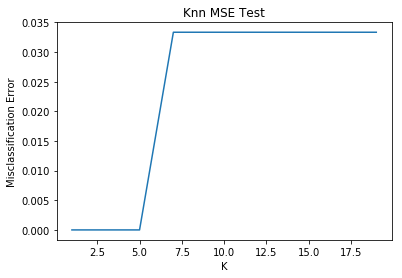

In [18]:
plot_knn_mse_test = plt.plot(knn_mse_test.k,knn_mse_test.Misclassification_Error)
plt.xlabel("K")
plt.ylabel("Misclassification Error")
plt.title("Knn MSE Test")

Text(0.5,1,'Knn MSE Train')

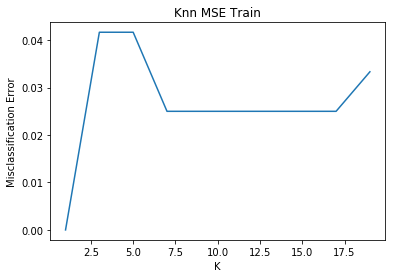

In [19]:
plot_knn_mse_train = plt.plot(knn_mse_train.k,knn_mse_train.Misclassification_Error)
plt.xlabel("K")
plt.ylabel("Misclassification Error")
plt.title("Knn MSE Train")